## Preparation work: downloading necessary files and importing necessary libraries

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
!pip install emoji
import emoji
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('omw-1.4')   # I added this command to run lemmatizer.lemmatize() without errors
nltk.download('averaged_perceptron_tagger')   # I added this command to run lemmatizer.lemmatize() without errors
from string import punctuation
import numpy as np
import pandas as pd
import re
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import matplotlib as mpl

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=ac960e07547e4836a7d07aa2773dc7156100d4673051d6b4d4616ddceba7770a
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


## Setting sets and functions for text pre-processing and lemmatization

In [2]:
stop_words = set(stopwords.words('english'))

In [3]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [4]:
lemmatizer = WordNetLemmatizer()

In [5]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  

In [6]:
def text_preprocessing_and_lemmatization(text):
    text = str(text).lower()

    lemmatized_words = []
    tokens = nltk.word_tokenize(text)
    processed_tokens = [remove_emojis(token) for token in tokens if token.isalpha() and token not in stop_words and token not in list(punctuation)]
    for word, tag in nltk.pos_tag(processed_tokens):
        pos = get_wordnet_pos(tag)
        lemma = lemmatizer.lemmatize(word, pos=pos)
        lemmatized_words.append(lemma)
    
    return ' '.join(lemmatized_words)

## Loading and visualizing PrimeVideo reviews

In [28]:
primevideo = pd.read_csv('PrimeVideo_Google_Play.csv')

In [29]:
primevideo.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,6656a790-b472-4928-b0f1-47e8ba0b81a4,Ashlee L,https://play-lh.googleusercontent.com/a-/ACB-R...,Love the app,5,0,3.0.342.12047,2023-04-05 10:49:46,NaN,NaN
1,1,c4fcc410-e5eb-42ba-9c41-557846039051,Anna Bowers,https://play-lh.googleusercontent.com/a-/ACB-R...,Love it,5,0,3.0.343.77747,2023-04-05 10:40:03,NaN,NaN
2,2,00a11da8-1490-4062-8217-769d8ed97933,Payal Kumari,https://play-lh.googleusercontent.com/a/AGNmyx...,Its very nice app we can watch 1000000000000 m...,5,0,NaN,2023-04-05 10:30:41,NaN,NaN
3,3,66138b1e-3ec8-4d2f-8a2a-aaf62ecf6354,Kathyrodney,https://play-lh.googleusercontent.com/a-/ACB-R...,Good,5,0,3.0.343.77747,2023-04-05 10:30:06,NaN,NaN
4,4,d3245f4b-7e07-411b-bf10-8b58be337849,Ray Rudd,https://play-lh.googleusercontent.com/a-/ACB-R...,I have found lots of free older series to watc...,4,0,3.0.343.77747,2023-04-05 10:26:51,NaN,NaN


In [30]:
primevideo.shape

(162782, 11)

In [31]:
primevideo.score.describe()

count    162782.000000
mean          3.574836
std           1.700276
min           1.000000
25%           1.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: score, dtype: float64

## Processing reviews

In [32]:
reviews = primevideo['content']
processed_reviews = reviews.apply(text_preprocessing_and_lemmatization)   # function to pre-process and lemmatize the reviews

processed_reviews

0                                                  love app
1                                                      love
2                  nice app watch movie please download app
3                                                      good
4         find lot free old series watch prime video mov...
                                ...                        
162777    excellent stream quality disturbance mind blowing
162778                                              awesome
162779                           app unstable wrought error
162780    great app many show hope american british show...
162781                                             nice app
Name: content, Length: 162782, dtype: object

In [33]:
primevideo['processed_reviews'] = processed_reviews

In [34]:
tokenized_reviews = [nltk.word_tokenize(review) for review in processed_reviews.to_list()]
primevideo['tokenized_reviews'] = pd.Series(tokenized_reviews)

In [35]:
primevideo

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,processed_reviews,tokenized_reviews
0,0,6656a790-b472-4928-b0f1-47e8ba0b81a4,Ashlee L,https://play-lh.googleusercontent.com/a-/ACB-R...,Love the app,5,0,3.0.342.12047,2023-04-05 10:49:46,NaN,NaN,love app,"[love, app]"
1,1,c4fcc410-e5eb-42ba-9c41-557846039051,Anna Bowers,https://play-lh.googleusercontent.com/a-/ACB-R...,Love it,5,0,3.0.343.77747,2023-04-05 10:40:03,NaN,NaN,love,[love]
2,2,00a11da8-1490-4062-8217-769d8ed97933,Payal Kumari,https://play-lh.googleusercontent.com/a/AGNmyx...,Its very nice app we can watch 1000000000000 m...,5,0,NaN,2023-04-05 10:30:41,NaN,NaN,nice app watch movie please download app,"[nice, app, watch, movie, please, download, app]"
3,3,66138b1e-3ec8-4d2f-8a2a-aaf62ecf6354,Kathyrodney,https://play-lh.googleusercontent.com/a-/ACB-R...,Good,5,0,3.0.343.77747,2023-04-05 10:30:06,NaN,NaN,good,[good]
4,4,d3245f4b-7e07-411b-bf10-8b58be337849,Ray Rudd,https://play-lh.googleusercontent.com/a-/ACB-R...,I have found lots of free older series to watc...,4,0,3.0.343.77747,2023-04-05 10:26:51,NaN,NaN,find lot free old series watch prime video mov...,"[find, lot, free, old, series, watch, prime, v..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162777,162777,06a2e1d7-d186-404a-a946-a8292a3ddc37,Neerak Kumar,https://play-lh.googleusercontent.com/a/AGNmyx...,Excellent streaming quality no disturbance min...,5,0,3.0.299.3045,2021-07-07 06:48:32,NaN,NaN,excellent stream quality disturbance mind blowing,"[excellent, stream, quality, disturbance, mind..."
162778,162778,f0fd48f5-122c-483d-8212-4879c1aeba49,Vivek Sharma,https://play-lh.googleusercontent.com/a-/ACB-R...,It is awesome,4,0,3.0.299.3047,2021-07-07 06:45:03,NaN,NaN,awesome,[awesome]
162779,162779,cd5c8ac9-f58c-40cc-8580-6371d5914294,M Webb,https://play-lh.googleusercontent.com/a-/ACB-R...,App is unstable and is wrought with errors.,1,0,NaN,2021-07-07 06:44:40,NaN,NaN,app unstable wrought error,"[app, unstable, wrought, error]"
162780,162780,aab6d694-4f1a-46e8-8baa-4c9562eb9c11,jay,https://play-lh.googleusercontent.com/a/AGNmyx...,"Great app, many shows, hope there's more Ameri...",4,7,3.0.299.3047,2021-07-07 06:43:47,NaN,NaN,great app many show hope american british show...,"[great, app, many, show, hope, american, briti..."


## Exploration of lemmatized words

In [36]:
lemmatized_words = []

for r in processed_reviews:
  lemmatized_words += r.split()

In [37]:
lemmatized_words

['love',
 'app',
 'love',
 'nice',
 'app',
 'watch',
 'movie',
 'please',
 'download',
 'app',
 'good',
 'find',
 'lot',
 'free',
 'old',
 'series',
 'watch',
 'prime',
 'video',
 'movie',
 'look',
 'tend',
 'cost',
 'apps',
 'android',
 'app',
 'easy',
 'app',
 'use',
 'sometimes',
 'require',
 'exit',
 'reload',
 'app',
 'order',
 'show',
 'already',
 'start',
 'watch',
 'populate',
 'overall',
 'good',
 'entertainment',
 'app',
 'awesome',
 'excite',
 'possible',
 'make',
 'bad',
 'subscribed',
 'channel',
 'get',
 'really',
 'poor',
 'interface',
 'difficult',
 'find',
 'anything',
 'need',
 'might',
 'want',
 'show',
 'cancel',
 'channel',
 'subscription',
 'get',
 'content',
 'want',
 'get',
 'act',
 'together',
 'amazon',
 'hard',
 'try',
 'test',
 'interface',
 'actual',
 'people',
 'last',
 'streaming',
 'service',
 'tie',
 'shopping',
 'app',
 'nice',
 'app',
 'good',
 'one',
 'make',
 'many',
 'movie',
 'rent',
 'user',
 'efficient',
 'pinch',
 'zoom',
 'zoom',
 'option',
 '

In [38]:
dict_words = {}

for word in lemmatized_words:
  if word in dict_words:
    dict_words[word] += 1
  else:
    dict_words[word] = 1

In [39]:
sorted_words_by_frequency = sorted(dict_words.items(), key=lambda x:x[1], reverse = True)
converted_dict = dict(sorted_words_by_frequency)

In [40]:
converted_dict

{'app': 43419,
 'good': 30641,
 'movie': 27144,
 'watch': 17169,
 'prime': 17138,
 'video': 16936,
 'great': 12381,
 'show': 12164,
 'amazon': 11823,
 'love': 11464,
 'nice': 9541,
 'use': 9019,
 'work': 8820,
 'like': 8689,
 'get': 7933,
 'bad': 7392,
 'time': 7163,
 'pay': 7092,
 'even': 6499,
 'ca': 6229,
 'best': 6163,
 'content': 6097,
 'quality': 6080,
 'download': 5655,
 'play': 5519,
 'tv': 5426,
 'go': 5225,
 'subscription': 5048,
 'one': 4668,
 'new': 4576,
 'well': 4556,
 'excellent': 4518,
 'need': 4425,
 'option': 4415,
 'experience': 4377,
 'stream': 4365,
 'please': 4297,
 'series': 4157,
 'service': 4151,
 'awesome': 4137,
 'phone': 4132,
 'want': 4052,
 'update': 4039,
 'free': 3935,
 'rent': 3869,
 'easy': 3865,
 'issue': 3718,
 'netflix': 3706,
 'screen': 3703,
 'try': 3638,
 'see': 3630,
 'make': 3570,
 'keep': 3520,
 'really': 3485,
 'much': 3458,
 'super': 3436,
 'also': 3417,
 'buy': 3388,
 'fix': 3376,
 'problem': 3321,
 'would': 3264,
 'give': 3242,
 'still': 3

## Exploration of bigrams

In [41]:
bigrams = [bigram for review in tokenized_reviews for bigram in nltk.bigrams(review)]

In [42]:
bigrams_counter = Counter(bigrams)

In [43]:
bigrams_counter

Counter({('love', 'app'): 1886,
         ('nice', 'app'): 1972,
         ('app', 'watch'): 665,
         ('watch', 'movie'): 2098,
         ('movie', 'please'): 92,
         ('please', 'download'): 38,
         ('download', 'app'): 399,
         ('find', 'lot'): 16,
         ('lot', 'free'): 33,
         ('free', 'old'): 5,
         ('old', 'series'): 20,
         ('series', 'watch'): 122,
         ('watch', 'prime'): 381,
         ('prime', 'video'): 5217,
         ('video', 'movie'): 111,
         ('movie', 'look'): 47,
         ('look', 'tend'): 1,
         ('tend', 'cost'): 1,
         ('cost', 'apps'): 1,
         ('apps', 'android'): 5,
         ('android', 'app'): 74,
         ('app', 'easy'): 430,
         ('easy', 'app'): 38,
         ('app', 'use'): 471,
         ('use', 'sometimes'): 8,
         ('sometimes', 'require'): 3,
         ('require', 'exit'): 2,
         ('exit', 'reload'): 1,
         ('reload', 'app'): 7,
         ('app', 'order'): 14,
         ('order', 'show')

In [44]:
sorted_bigrams_by_frequency = sorted(bigrams_counter.items(), key=lambda x:x[1], reverse = True)
converted_dict_bigrams = dict(sorted_bigrams_by_frequency)

In [45]:
converted_dict_bigrams

{('prime', 'video'): 5217,
 ('amazon', 'prime'): 4935,
 ('good', 'app'): 3010,
 ('great', 'app'): 2223,
 ('watch', 'movie'): 2098,
 ('nice', 'app'): 1972,
 ('easy', 'use'): 1896,
 ('love', 'app'): 1886,
 ('bad', 'app'): 1520,
 ('movie', 'show'): 1373,
 ('show', 'movie'): 1357,
 ('video', 'quality'): 1340,
 ('good', 'movie'): 1279,
 ('tv', 'show'): 1279,
 ('app', 'work'): 1254,
 ('new', 'movie'): 1225,
 ('best', 'app'): 1100,
 ('want', 'watch'): 1003,
 ('use', 'app'): 992,
 ('movie', 'tv'): 959,
 ('rent', 'movie'): 947,
 ('please', 'fix'): 934,
 ('video', 'app'): 934,
 ('movie', 'series'): 880,
 ('love', 'prime'): 867,
 ('ca', 'watch'): 860,
 ('great', 'movie'): 827,
 ('prime', 'membership'): 809,
 ('every', 'time'): 807,
 ('play', 'video'): 776,
 ('ca', 'even'): 773,
 ('rent', 'buy'): 753,
 ('love', 'amazon'): 735,
 ('movie', 'app'): 735,
 ('app', 'good'): 731,
 ('bad', 'experience'): 730,
 ('app', 'ever'): 704,
 ('app', 'watch'): 665,
 ('watch', 'anything'): 658,
 ('work', 'well'): 65

## Exploration of trigrams

In [46]:
trigrams = [trigram for review in tokenized_reviews for trigram in nltk.trigrams(review)]

In [47]:
trigrams_counter = Counter(trigrams)

In [48]:
sorted_trigrams_by_frequency = sorted(trigrams_counter.items(), key=lambda x:x[1], reverse = True)
converted_dict_trigrams = dict(sorted_trigrams_by_frequency)

In [49]:
converted_dict_trigrams

{('amazon', 'prime', 'video'): 1545,
 ('movie', 'tv', 'show'): 642,
 ('prime', 'video', 'app'): 571,
 ('love', 'amazon', 'prime'): 496,
 ('love', 'prime', 'video'): 375,
 ('bad', 'app', 'ever'): 294,
 ('movie', 'web', 'series'): 285,
 ('app', 'easy', 'use'): 283,
 ('app', 'watch', 'movie'): 228,
 ('rent', 'buy', 'movie'): 216,
 ('ca', 'watch', 'anything'): 193,
 ('tv', 'show', 'movie'): 185,
 ('best', 'app', 'ever'): 175,
 ('best', 'ott', 'platform'): 148,
 ('watch', 'prime', 'video'): 144,
 ('app', 'work', 'well'): 142,
 ('great', 'selection', 'movie'): 142,
 ('app', 'keep', 'crash'): 142,
 ('amazon', 'prime', 'app'): 140,
 ('ca', 'even', 'watch'): 136,
 ('movie', 'tv', 'series'): 135,
 ('app', 'work', 'properly'): 124,
 ('use', 'prime', 'video'): 123,
 ('movie', 'want', 'watch'): 122,
 ('buy', 'rent', 'movie'): 119,
 ('watch', 'amazon', 'prime'): 117,
 ('use', 'amazon', 'prime'): 114,
 ('app', 'work', 'fine'): 113,
 ('movie', 'amazon', 'prime'): 113,
 ('ca', 'rent', 'buy'): 111,
 ('p

## Visualization of main trigrams

We find the top 10 trigrams

In [50]:
top_trigrams = []
counter = 0

for trigram in converted_dict_trigrams:
  top_trigrams.append(trigram)
  counter += 1

  if counter >= 10:   # change if you want a different number of top reviews
    break

top_trigrams

[('amazon', 'prime', 'video'),
 ('movie', 'tv', 'show'),
 ('prime', 'video', 'app'),
 ('love', 'amazon', 'prime'),
 ('love', 'prime', 'video'),
 ('bad', 'app', 'ever'),
 ('movie', 'web', 'series'),
 ('app', 'easy', 'use'),
 ('app', 'watch', 'movie'),
 ('rent', 'buy', 'movie')]

We add a column with trigrams for each review to the df

In [51]:
trigrams_for_review = pd.Series([[trigram for trigram in nltk.trigrams(review)] for review in tokenized_reviews])

In [52]:
trigrams_for_review

0                                                        []
1                                                        []
2         [(nice, app, watch), (app, watch, movie), (wat...
3                                                        []
4         [(find, lot, free), (lot, free, old), (free, o...
                                ...                        
162777    [(excellent, stream, quality), (stream, qualit...
162778                                                   []
162779    [(app, unstable, wrought), (unstable, wrought,...
162780    [(great, app, many), (app, many, show), (many,...
162781                                                   []
Length: 162782, dtype: object

In [53]:
primevideo['trigrams'] = trigrams_for_review

In [54]:
primevideo

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,processed_reviews,tokenized_reviews,trigrams
0,0,6656a790-b472-4928-b0f1-47e8ba0b81a4,Ashlee L,https://play-lh.googleusercontent.com/a-/ACB-R...,Love the app,5,0,3.0.342.12047,2023-04-05 10:49:46,NaN,NaN,love app,"[love, app]",[]
1,1,c4fcc410-e5eb-42ba-9c41-557846039051,Anna Bowers,https://play-lh.googleusercontent.com/a-/ACB-R...,Love it,5,0,3.0.343.77747,2023-04-05 10:40:03,NaN,NaN,love,[love],[]
2,2,00a11da8-1490-4062-8217-769d8ed97933,Payal Kumari,https://play-lh.googleusercontent.com/a/AGNmyx...,Its very nice app we can watch 1000000000000 m...,5,0,NaN,2023-04-05 10:30:41,NaN,NaN,nice app watch movie please download app,"[nice, app, watch, movie, please, download, app]","[(nice, app, watch), (app, watch, movie), (wat..."
3,3,66138b1e-3ec8-4d2f-8a2a-aaf62ecf6354,Kathyrodney,https://play-lh.googleusercontent.com/a-/ACB-R...,Good,5,0,3.0.343.77747,2023-04-05 10:30:06,NaN,NaN,good,[good],[]
4,4,d3245f4b-7e07-411b-bf10-8b58be337849,Ray Rudd,https://play-lh.googleusercontent.com/a-/ACB-R...,I have found lots of free older series to watc...,4,0,3.0.343.77747,2023-04-05 10:26:51,NaN,NaN,find lot free old series watch prime video mov...,"[find, lot, free, old, series, watch, prime, v...","[(find, lot, free), (lot, free, old), (free, o..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162777,162777,06a2e1d7-d186-404a-a946-a8292a3ddc37,Neerak Kumar,https://play-lh.googleusercontent.com/a/AGNmyx...,Excellent streaming quality no disturbance min...,5,0,3.0.299.3045,2021-07-07 06:48:32,NaN,NaN,excellent stream quality disturbance mind blowing,"[excellent, stream, quality, disturbance, mind...","[(excellent, stream, quality), (stream, qualit..."
162778,162778,f0fd48f5-122c-483d-8212-4879c1aeba49,Vivek Sharma,https://play-lh.googleusercontent.com/a-/ACB-R...,It is awesome,4,0,3.0.299.3047,2021-07-07 06:45:03,NaN,NaN,awesome,[awesome],[]
162779,162779,cd5c8ac9-f58c-40cc-8580-6371d5914294,M Webb,https://play-lh.googleusercontent.com/a-/ACB-R...,App is unstable and is wrought with errors.,1,0,NaN,2021-07-07 06:44:40,NaN,NaN,app unstable wrought error,"[app, unstable, wrought, error]","[(app, unstable, wrought), (unstable, wrought,..."
162780,162780,aab6d694-4f1a-46e8-8baa-4c9562eb9c11,jay,https://play-lh.googleusercontent.com/a/AGNmyx...,"Great app, many shows, hope there's more Ameri...",4,7,3.0.299.3047,2021-07-07 06:43:47,NaN,NaN,great app many show hope american british show...,"[great, app, many, show, hope, american, briti...","[(great, app, many), (app, many, show), (many,..."


In [55]:
score_sum = np.zeros(10)   # change if you want a different number of top reviews

for j in range(len(top_trigrams)):
  for i in range(len(primevideo.trigrams)):
    if top_trigrams[j] in primevideo.trigrams[i]:
      score_sum[j] += primevideo.score[i]

In [56]:
counter = []

for trigram in top_trigrams:
  counter.append(converted_dict_trigrams[trigram])

In [57]:
score_average = score_sum / np.array(counter)

In [58]:
score_average

array([3.40323625, 3.82087227, 2.69176883, 4.79233871, 4.74666667,
       1.06122449, 3.67017544, 4.74204947, 4.29824561, 1.72685185])

In [59]:
trigrams_scores = pd.DataFrame({'top_trigrams': top_trigrams, 'avg_rating': score_average, 'counter': counter})

In [60]:
trigrams_scores

,top_trigrams,avg_rating,counter
0,"(amazon, prime, video)",3.403236,1545
1,"(movie, tv, show)",3.820872,642
2,"(prime, video, app)",2.691769,571
3,"(love, amazon, prime)",4.792339,496
4,"(love, prime, video)",4.746667,375
5,"(bad, app, ever)",1.061224,294
6,"(movie, web, series)",3.670175,285
7,"(app, easy, use)",4.742049,283
8,"(app, watch, movie)",4.298246,228
9,"(rent, buy, movie)",1.726852,216


In [61]:
trigrams_scores.avg_rating = round(trigrams_scores.avg_rating, 2)

In [62]:
trigrams_scores

,top_trigrams,avg_rating,counter
0,"(amazon, prime, video)",3.40,1545
1,"(movie, tv, show)",3.82,642
2,"(prime, video, app)",2.69,571
3,"(love, amazon, prime)",4.79,496
4,"(love, prime, video)",4.75,375
5,"(bad, app, ever)",1.06,294
6,"(movie, web, series)",3.67,285
7,"(app, easy, use)",4.74,283
8,"(app, watch, movie)",4.30,228
9,"(rent, buy, movie)",1.73,216


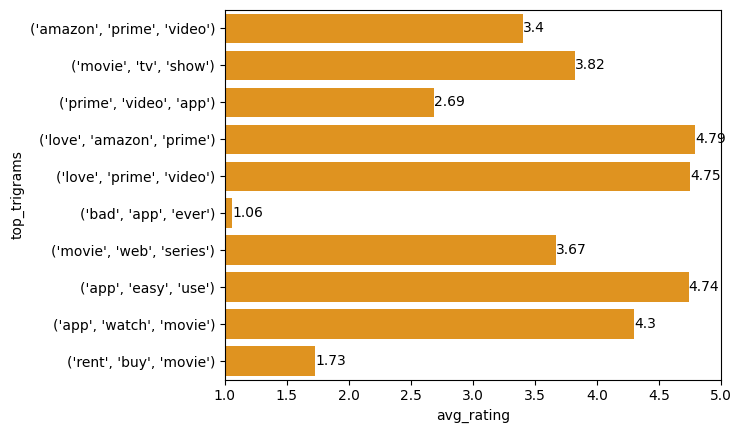

In [63]:
g = sns.barplot(data=trigrams_scores, y = 'top_trigrams', x = 'avg_rating', color = '#FF9900', orient = 'h')
g.axes.set_xlim(1, 5)
for i in g.containers:
    g.bar_label(i,)

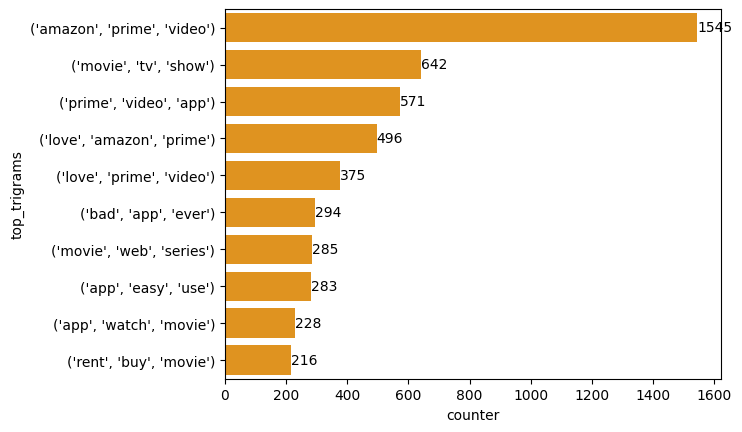

In [64]:
g = sns.barplot(data=trigrams_scores, y = 'top_trigrams', x = 'counter', color = '#FF9900', orient = 'h')
for i in g.containers:
    g.bar_label(i,)

In [65]:
trigrams_scores['top_trigrams'] = trigrams_scores['top_trigrams'].astype(str)

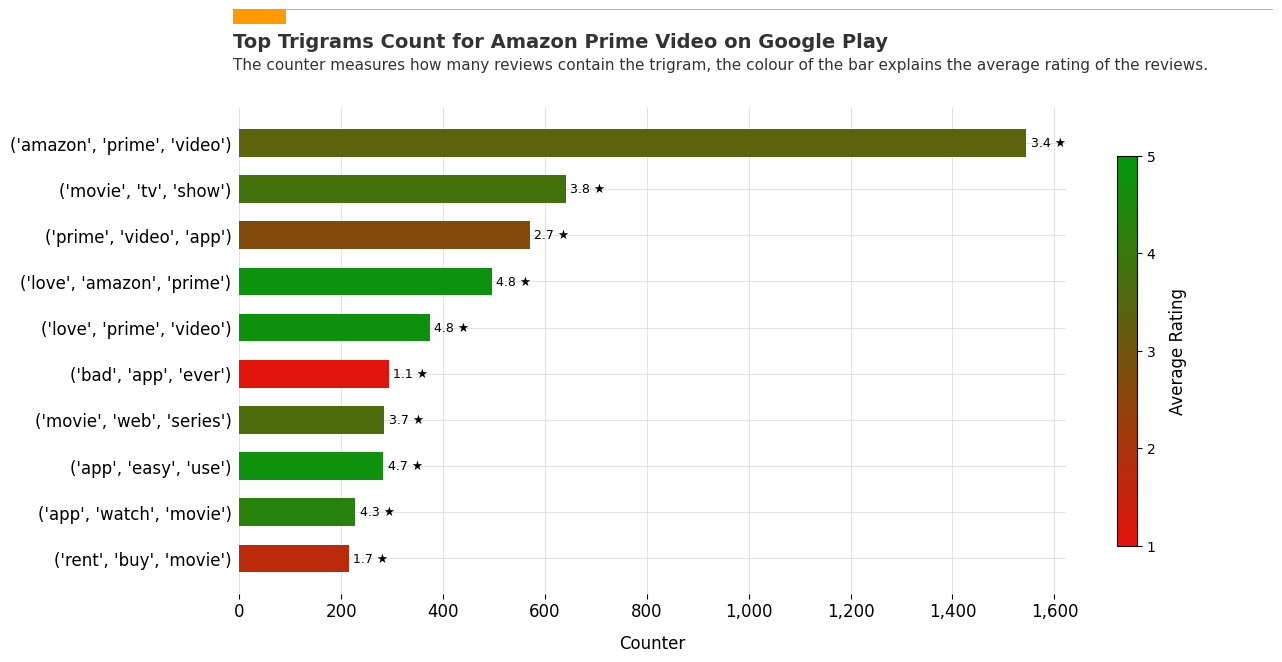

In [66]:
# Create the figure and axes objects, specify the size and the dots per inches 
fig, ax = plt.subplots(figsize=(13.33,7.5), dpi=100)

# Create a linear color map from red to green
cmap = mpl.colors.LinearSegmentedColormap.from_list('rating_map', ['#E3120B', '#00990C'], N=256)

# Normalize the ratings to the [0.0, 1.0] interval
norm = mpl.colors.Normalize(vmin=1, vmax=5)

# Compute the color for each bar based on its rating
colors = [cmap(norm(r)) for r in trigrams_scores['avg_rating']]

# Plot horizontal bars with the computed colors
bar1 = ax.barh(trigrams_scores['top_trigrams'], trigrams_scores['counter'], height=0.6, color=colors, alpha=1,zorder=3)

# Set the ticks and labels
ax.set_yticks(trigrams_scores['top_trigrams'])
ax.set_yticklabels(trigrams_scores['top_trigrams'], fontsize=10)
ax.set_xticks(range(0, 1000, 100))
ax.set_xticklabels(range(0, 1000, 100), fontsize=10)

# Invert the y-axis to show the bars in descending order
ax.invert_yaxis()

# Create the grid 
ax.grid(which='major', axis='x', color='#DAD8D7', alpha=0.7, zorder=1)
ax.grid(which='major', axis='y', color='#DAD8D7', alpha=0.7, zorder=1)

# Add labels to the bars
# Add labels to the bars
labels = [f'{e:.1f} \u2605' for e in trigrams_scores['avg_rating']]
ax.bar_label(bar1, labels=labels, padding=3, color='black', fontsize=9)


# Set x-axis formatting and tick parameters
ax.xaxis.set_label_position('bottom')
ax.xaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)
labels = ['0', '100', '200', '300', '400', '500', '600', '700', '800', '900', '1000', '1100']
ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#FF9900', transform=fig.transFigure, clip_on=False, linewidth = 0))
ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#FF9900', linewidth=.6)

# Reformat y-axis
ax.yaxis.set_label_position('left')
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)
ax.spines[['top', 'left', 'bottom']].set_visible(False)
ax.spines['right'].set_linewidth(1.1)

# Add a color bar to the right of the plot
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, shrink=0.8, aspect = 20, ticks=np.arange(1, 6, 1))
cbar.set_label('Average Rating', fontsize=12, labelpad=10)
cbar.ax.tick_params(labelsize=10)

# Add title and subtitle
ax.text(x=0.12, y=0.93, s='Top Trigrams Count for Amazon Prime Video on Google Play', transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.12, y=0.90, s='The counter measures how many reviews contain the trigram, the colour of the bar explains the average rating of the reviews.', transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)

ax.set_xlabel('Counter', fontsize=12, labelpad=10)

# Remove the right spine
ax.spines['right'].set_visible(False)


plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)

## Creation of Word2Vec using genism

In [67]:
import gensim
from gensim.models import Word2Vec 
model = Word2Vec(tokenized_reviews, window=5, min_count=5)

In [68]:
model.wv.most_similar(positive=['service', 'positive'], negative = ['issue'], topn=10)

[('attitude', 0.6700081825256348),
 ('treat', 0.6516581773757935),
 ('satisfaction', 0.6468220353126526),
 ('excuse', 0.6429941654205322),
 ('genuinely', 0.6352919340133667),
 ('arse', 0.6258476972579956),
 ('overprice', 0.6237092018127441),
 ('dissapointing', 0.6196607351303101),
 ('course', 0.6181715130805969),
 ('kidding', 0.6163845062255859)]